> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, the TMDb movie data will be investigated from different aspects like:
 - Which genres are most popoular, costs more in production and gets more revenue.
 - investigate if there was a relationship between cost and popularity.
 - investigate if there was a relationship between popularity and run time.
 
 We first start by importing the necessary python libraries, and downloading the data set.
 

In [1]:
# importing python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
r = requests.get(url, allow_redirects=True)
open('tmbd-movies.csv', 'wb').write(r.content)

6883750

In [3]:
df_oringinal = pd.read_csv('tmbd-movies.csv')
df = df_oringinal.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

## First: Assessing df

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Second: defining possible problems:
- release_date dhould be datetime stamp (Done)

- release_year is a redundant column (Done)

- drop the rows with NaN genre.

- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.


## Third: Cleaning the problems:


In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['id'] = str(df['id'])

In [8]:
df.drop(['release_year'], axis=1, inplace = True)

In [9]:
df.dropna(subset=['genres'], inplace = True)

In [10]:
#dummies = df['genres'].str.get_dummies(sep='|')
#genres= dummies.columns

#df = pd.concat([df, dummies], axis=1)

Those columns had some null values, but I will not be analysing them that's why I didn't process them
- cast                    10768 non-null object
- homepage                2931 non-null object
- director                10801 non-null object
- tagline                 8037 non-null object
- keywords                9368 non-null object
- overview                10840 non-null object

# Exploratory Data Analysis

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.sample()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
9066,0 135397\n1 76341\n2 262...,tt0120879,0.462677,0,1053788,Velvet Goldmine,Ewan McGregor|Christian Bale|Jonathan Rhys Mey...,NaN,Todd Haynes,Style matters. Even when it comes to murder.,gay|great britain|glam rock|bisexual|music jou...,Almost a decade has elapsed since Bowie esque ...,119,Drama|Music,NaN,1998-10-26,49,6.7,0.0,1.409647e+06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 20 columns):
id                      10843 non-null object
imdb_id                 10835 non-null object
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
homepage                2931 non-null object
director                10801 non-null object
tagline                 8037 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null datetime64[ns]
vote_count              10843 non-null int64
vote_average            10843 non-null float64
budget_adj              10843 non-null float64
revenue_adj   

In [13]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,1.084300e+04,1.084300e+04
mean,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,1.758827e+07,5.147332e+07
std,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,3.433299e+07,1.447664e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2.093530e+07,3.387655e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### Research Question 1  ( Which genres are most popoular, costs more in prodction and gets more revenue?)
The main purpose of this analysis was to investigate if different genres of movies have different statistics in terms of popularity, budget and revenue. Does these parameters differ according to the movie genre, or not. And if so, what movie genres are the most popular, and what genres cost more money in production, or gets the most revenues. As an initial step, I investigated the distribution of the 4 variables: ['popularity', 'budget_adj', 'revenue_adj', 'runtime'], then I made a list of all movies genres, and computed their statistics using for loops over the list of genres.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f977fc1a6a0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f977fb608d0>]], dtype=object)

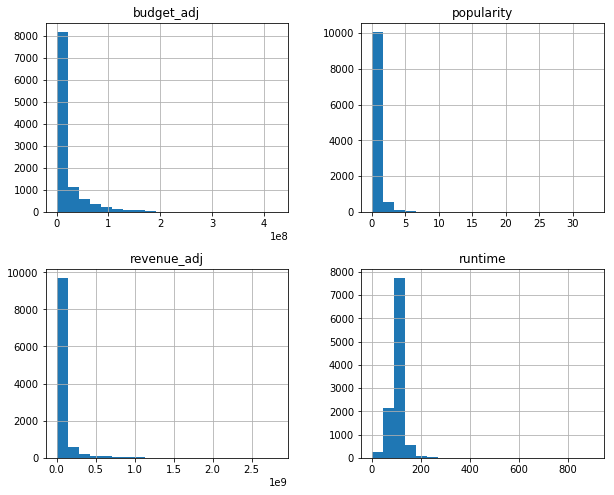

In [14]:
#Explore distribution of some columns
stat_columns = ['popularity', 'budget_adj', 'revenue_adj', 'runtime']
df[stat_columns].hist(figsize= (10, 8), bins = 20,)

From this distribution, it was clear that all the budget, revenue, and popularity have distributions skewed to the right, so it was interesting to see what genres are the highest scoring and causing this right skewedness

#### First: relationship between genres and popularity

{'Action': 0.92613613626834379, 'Adventure': 1.1542590441876273, 'Animation': 0.85218165236051491, 'Comedy': 0.59260734220933287, 'Crime': 0.74482085092250916, 'Documentary': 0.18143162499999996, 'Drama': 0.59149635475740381, 'Family': 0.78666839398862698, 'Fantasy': 0.99283970633187768, 'Foreign': 0.19149632446808507, 'History': 0.57593594311377239, 'Horror': 0.46535663042150271, 'Music': 0.48732118382352935, 'Mystery': 0.69001213209876522, 'Romance': 0.5920820490654205, 'Science Fiction': 1.0012182861788617, 'TV Movie': 0.27089576047904185, 'Thriller': 0.74151308459422294, 'War': 0.72768314814814816, 'Western': 0.59061547878787868}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.


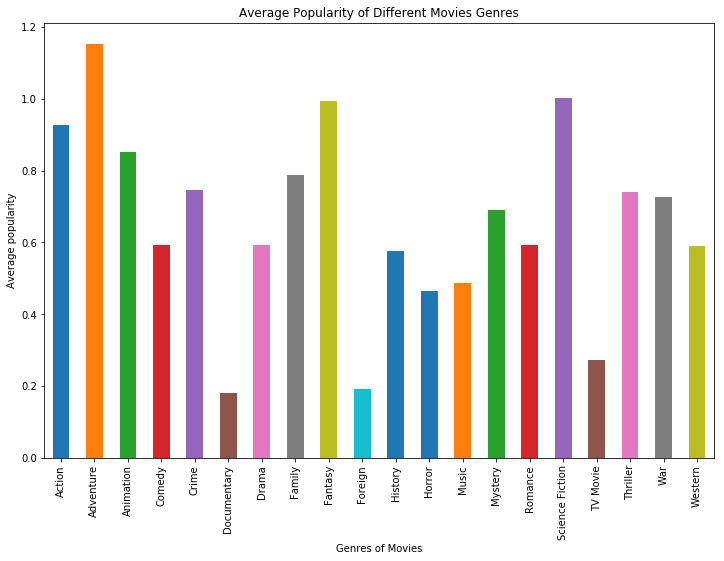

In [23]:

dummies = df['genres'].str.get_dummies(sep='|')
genres= dummies.columns


def average_popularity(df):
    av_popolariy= {}
    for i in genres:
        score = df[df['genres'].str.contains(i)].popularity.mean()
        av_popolariy[i] = score
    return av_popolariy

popularity_per_genre = average_popularity(df)
print(popularity_per_genre)

##plotting
freq_series = pd.Series.from_array(popularity_per_genre)
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Average popularity')
fig.set_xlabel('Genres of Movies')
fig.set_title('Average Popularity of Different Movies Genres')
plt.show()



According to the popularity by genre analysis, it was found that Adventure movies are the most popular and documentary movies are the least popular. Science fiction came second in popularity analysis followed by Fantasy and Action.

#### Second: relationship between genres and budget (we will use the adjusted budget because it takes inflation into account)


{'Action': 32958868.082291998, 'Adventure': 43937335.30839505, 'Animation': 25295349.70776384, 'Comedy': 15920313.754511228, 'Crime': 21539761.180705789, 'Documentary': 623222.64701436087, 'Drama': 14856715.556323428, 'Family': 26923889.64338601, 'Fantasy': 37429315.045488052, 'Foreign': 2379150.9546933011, 'History': 26558024.955952365, 'Horror': 7764841.0563298659, 'Music': 12988864.417038245, 'Mystery': 19482306.85939768, 'Romance': 15659223.758465873, 'Science Fiction': 29524675.184025139, 'TV Movie': 296021.51943809266, 'Thriller': 20686166.344152987, 'War': 28930066.815887537, 'Western': 24497439.496599544}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  


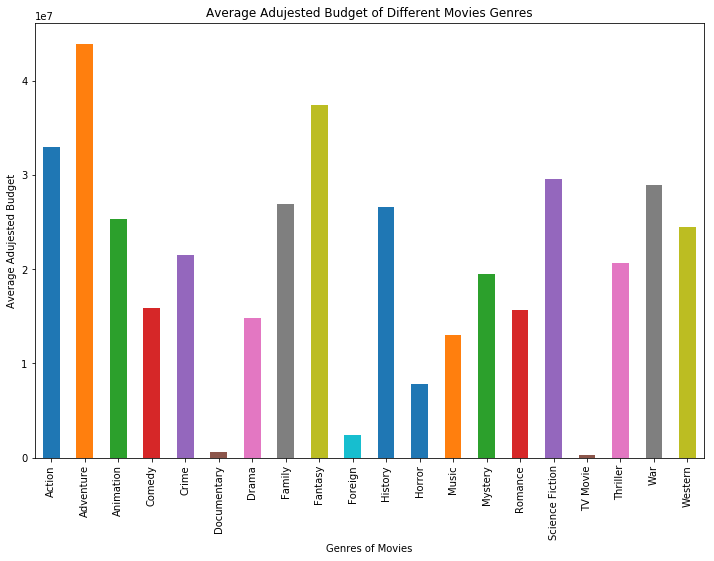

In [24]:

def average_budget(df):
    av_budget= {}
    for i in genres:
        score = df[df['genres'].str.contains(i)].budget_adj.mean()
        av_budget[i] = score
    return av_budget

budget_per_genre = average_budget(df)
print(budget_per_genre)

##plotting
freq_series = pd.Series.from_array(budget_per_genre)
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Average Adujested Budget')
fig.set_xlabel('Genres of Movies')
fig.set_title('Average Adujested Budget of Different Movies Genres')
plt.show()


It was clear that Adventure movies cost the most in production, followed by fantasy movies, and Action movies came third, While TV movies got the lowest budget statistics followed by documentary movies.

#### Third: relationship between genres and revenue (we will use the adjusted revenue because it takes inflation into account)

{'Action': 91720204.020609558, 'Adventure': 141675228.03473327, 'Animation': 85256126.912598044, 'Comedy': 47897001.399330355, 'Crime': 56595325.67915947, 'Documentary': 2258210.4744011322, 'Drama': 40408852.142783381, 'Family': 87736710.196207643, 'Fantasy': 111234151.18428829, 'Foreign': 1784285.9167867023, 'History': 47948583.847600318, 'Horror': 24082710.606239911, 'Music': 46655919.887821496, 'Mystery': 50889295.998337768, 'Romance': 48200221.202581406, 'Science Fiction': 86908490.364447668, 'TV Movie': 349635.34752293775, 'Thriller': 55267419.370631114, 'War': 69986112.555770367, 'Western': 46101264.417556345}


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: 'from_array' is deprecated and will be removed in a future version. Please use the pd.Series(..) constructor instead.
  del sys.path[0]


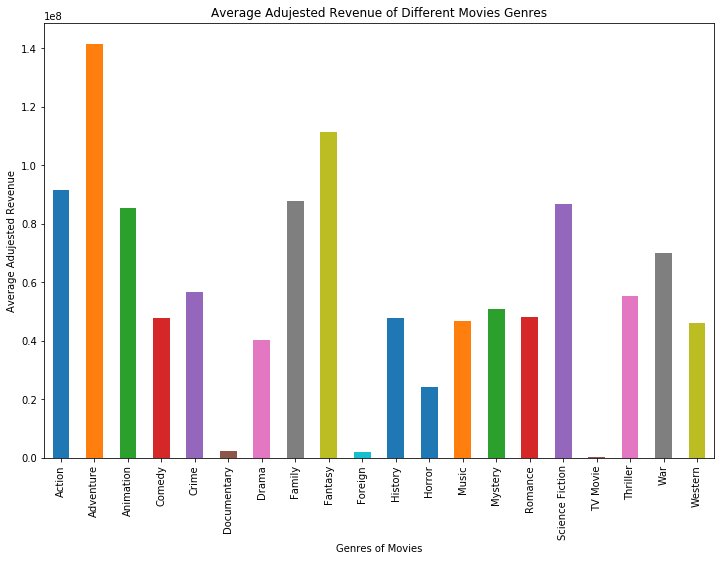

In [35]:

def average_revenue(df):
    av_revenue= {}
    for i in genres:
        score = df[df['genres'].str.contains(i)].revenue_adj.mean()
        av_revenue[i] = score
    return av_revenue

revenue_per_genre = average_revenue(df)
print(revenue_per_genre)

##plotting
freq_series = pd.Series.from_array(revenue_per_genre)
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Average Adujested Revenue')
fig.set_xlabel('Genres of Movies')
fig.set_title('Average Adujested Revenue of Different Movies Genres')
plt.show()


Adventure movies also got the highest revenues, followed by fantasy movies, and Action movies came third. Also, the TV movies got the lowest revenues statistics followed by foreign movies then documentary movies.

### Research Question 2  ( Investigate if there was a relationship between cost and popularity.)
Since Adventure movies got the highest in both cost and popularity, it was intriguing to investigate if there was a relationship between them.


Text(0.5,1,'Scatter plot for Movies Popularity vs Adjusted Budget')

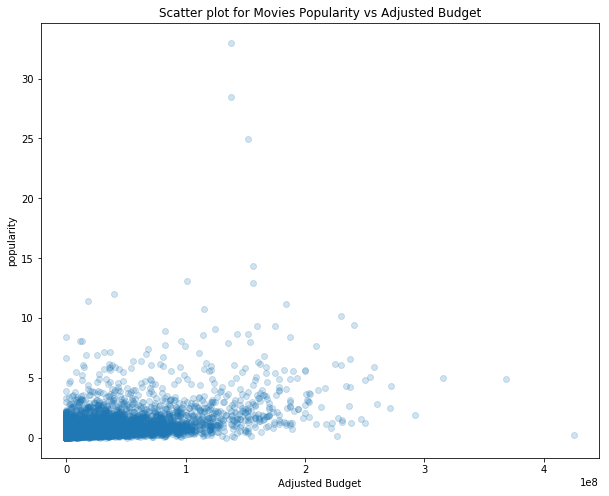

In [33]:
plt.figure(figsize= (10, 8))
figg = plt.scatter(df.budget_adj, df.popularity, alpha= 0.2)
plt.xlabel('Adjusted Budget')
plt.ylabel('popularity')
plt.title('Scatter plot for Movies Popularity vs Adjusted Budget')


No coloration was found between budget and popularity.

### Research Question 3  (Investigate if there was a relationship between budget and run time.)
Since no coloration was found between budget and popularity, I thought of investigating the relationship between budget and runtime because runtime can also indicate popularity at the time the movies was released.

Text(0.5,1,'Scatter plot for Movies Runtime vs Adjusted Budget')

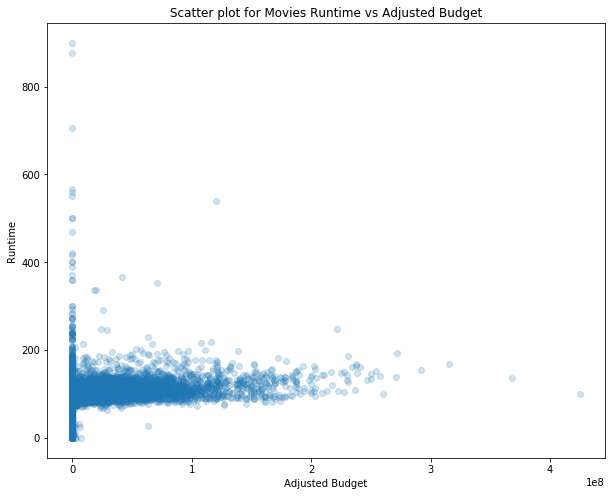

In [32]:
plt.figure(figsize= (10, 8))
figg = plt.scatter(df.budget_adj, df.runtime, alpha= 0.2)
plt.xlabel('Adjusted Budget')
plt.ylabel('Runtime')
plt.title('Scatter plot for Movies Runtime vs Adjusted Budget')


Also, no correlation was found in the scatter plot, which confirms the previous analysis of popularity vs budget.

### Research Question 4(Investigate if there was a relationship between budget and Revenues)
A final Question I had in mind was if there was a corelation between the cost of the movie and the money it makes.


Text(0.5,1,'Scatter plot for Movies Adjusted Revenue vs Adjusted Budget')

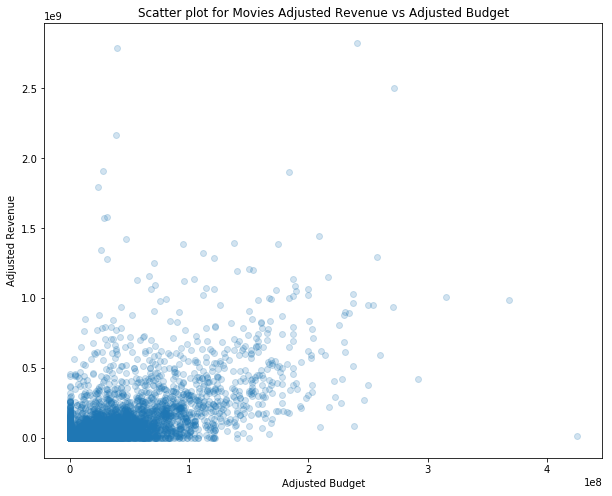

In [30]:
plt.figure(figsize= (10, 8))
figg = plt.scatter(df.budget_adj, df.revenue_adj, alpha= 0.2)
plt.xlabel('Adjusted Budget')
plt.ylabel('Adjusted Revenue')
plt.title('Scatter plot for Movies Adjusted Revenue vs Adjusted Budget')


A slight positive linear correlation was found between budget and revenues.

<a id='conclusions'></a>
## Conclusions
The database of TMDB movies had 10866 entry for analysis which I believe is great starting point for analysis. Of course more data would led to better results, but the data in hand was sufficient to draw conclusions. Unfortunately, I faced some limitations because only 10843 entries had their genre values, so I had to drop the rows with null genre values (only 23 entries).
Moreover, I believe that the scatter plot analysis for drawing if a correlation was present was not enough, and a linear regression model would have been more informative. However, I still do not know how to do a linear regression. Therefore, I saved that until after finishing the statistics part of the course.
The finding I was able to make with my limited data and resources can be summarized in the following lines. According to the popularity by genre analysis, it was found that Adventure movies are the most popular and documentary movies are the least popular. Adventure movies were also the highest in both the revenue and cost analysis. In addition, the two graphs were very similar which made me wonder if there was a relationship between the three variables: popularity, budget and revenue. In the scatter plot between budget and popularity, no correlation was observed for the variables. That is why I thought of investigating the relationship between budget and runtime, which showed no correlation. I also investigated the relationship between budget and revenue, which showed a slight positive linear correlation.



## Submitting your Project 



In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0